# Evaluate

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

### 1. Reading the Dataset

In [2]:
df = pd.read_csv('../UPDATE-TSA-NOTEBOOKS/Data/Miles_Traveled.csv')
df.head()

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
DATE                588 non-null object
TRFVOLUSM227NFWA    588 non-null float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [5]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

In [6]:
df.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


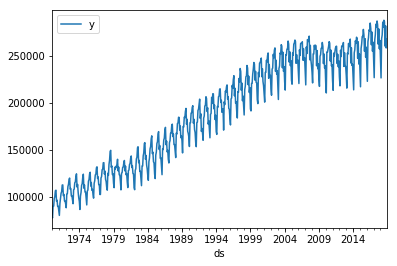

In [7]:
df.plot(x='ds',y='y');

### 3. Train Test Split

In [8]:
len(df)

588

In [10]:
# One year for Testing Dataset
train = df.iloc[:576]
test = df.iloc[576:]

### 4. Model

In [11]:
from fbprophet import Prophet
m = Prophet()
m.fit(train)

/home/eduardo/.local/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
# In Stead of doing df.index.freq = 'MS' as we do in Statsmodel
future = m.make_future_dataframe(periods=12,freq='MS')
preds = m.predict(future)
preds.head() # to find out more about the output

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1970-01-01,94162.298231,69612.608795,81052.406874,94162.298231,94162.298231,-18588.461143,-18588.461143,-18588.461143,-18588.461143,-18588.461143,-18588.461143,0.0,0.0,0.0,75573.837088
1,1970-02-01,94474.349513,61641.012902,72739.461972,94474.349513,94474.349513,-27100.441623,-27100.441623,-27100.441623,-27100.441623,-27100.441623,-27100.441623,0.0,0.0,0.0,67373.907890
2,1970-03-01,94756.202283,89442.185742,100012.586703,94756.202283,94756.202283,-26.118264,-26.118264,-26.118264,-26.118264,-26.118264,-26.118264,0.0,0.0,0.0,94730.084020
3,1970-04-01,95068.253565,89658.915125,101216.950883,95068.253565,95068.253565,34.728408,34.728408,34.728408,34.728408,34.728408,34.728408,0.0,0.0,0.0,95102.981973
4,1970-05-01,95370.238676,99276.009180,110683.476812,95370.238676,95370.238676,9620.483640,9620.483640,9620.483640,9620.483640,9620.483640,9620.483640,0.0,0.0,0.0,104990.722316


In [14]:
# yhat, yhat_lower and yhat_upper are probably the most important terms of this DF
preds[['ds','yhat_lower','yhat_upper','yhat']].tail(12)

,ds,yhat_lower,yhat_upper,yhat
576,2018-01-01,238136.904728,249563.369223,243850.453937
577,2018-02-01,229728.450625,241144.627908,235480.588794
578,2018-03-01,257069.778654,268394.077224,262683.274392
579,2018-04-01,257046.668221,268773.722917,262886.236399
580,2018-05-01,266922.844606,278768.511903,272609.522601
581,2018-06-01,267353.232961,278588.125055,272862.615300
582,2018-07-01,273560.983037,284440.381708,279321.841101
583,2018-08-01,273906.706498,285717.693334,279858.813654
584,2018-09-01,256071.256701,267694.724551,261882.497404
585,2018-10-01,263577.191001,274829.651134,268995.952784


### 5. Plotting the Results

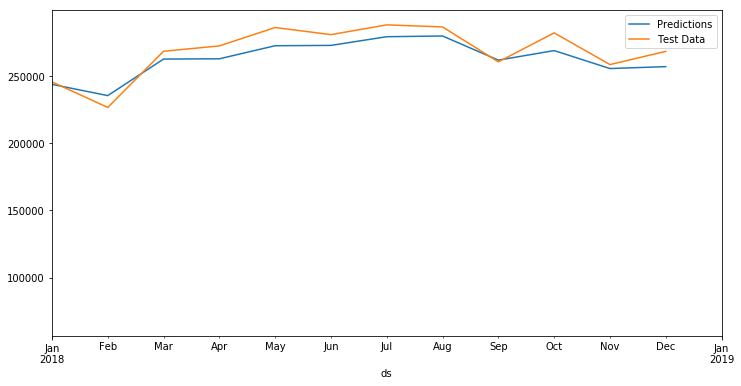

In [19]:
ax = preds.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,6))
test.plot(x='ds',y='y',label='Test Data',legend=True,ax=ax,xlim=('2018-01-01','2019-01-01'));

### 6. Evaluate the Model

In [26]:
from statsmodels.tools.eval_measures import rmse
# Alternative:
# from sklearn.metrics import mean_squared_error
RMSE = rmse(test['y'],preds['yhat'][-12:])
RMSE

8618.783155559411

In [27]:
test['y'].mean()

268739.6666666667

In [28]:
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [31]:
# The initial period should be long enough to capture all of the components of the model, 
# in particular seasonalities and extra regressors: at least a year for yearly seasonality,
# at least a week for weekly seasonality, etc.

# Initial training period
initial = 5 * 365
initial = str(initial) + ' days'
# Period lenght that we are going to perform the cross validation. How many times to fold?
period = 5 * 365
period = str(period) + ' days'
# Horizon of prediction for essentially each fold
horizon = 365
horizon = str(horizon) + ' days'

In [32]:
df_cv = cross_validation(m,initial=initial,period=period,horizon=horizon)

INFO:fbprophet:Making 9 forecasts with cutoffs between 1976-12-11 00:00:00 and 2016-12-01 00:00:00
/home/eduardo/.local/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
/home/eduardo/.local/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
/home/eduardo/.local/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
/home/eduardo/.local/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version

In [33]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1977-01-01,108470.618904,106949.688414,109913.369027,102445.0,1976-12-11
1,1977-02-01,102999.275720,101645.580618,104340.937308,102416.0,1976-12-11
2,1977-03-01,118894.097843,117533.778843,120451.028996,119960.0,1976-12-11
3,1977-04-01,120535.080258,119095.122667,122159.032514,121513.0,1976-12-11
4,1977-05-01,127801.862911,126348.947975,129319.586367,128884.0,1976-12-11


In [34]:
len(df_cv)

108

In [35]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,coverage
1,52 days,2.401243e+07,4900.247503,4505.853953,0.027625,0.3
13,53 days,2.150848e+07,4637.723095,4238.979154,0.024866,0.3
25,54 days,1.807726e+07,4251.735826,3709.259697,0.019936,0.4
37,55 days,2.298242e+07,4793.998548,4236.591665,0.023045,0.3
49,57 days,2.078973e+07,4559.576152,3972.403692,0.021320,0.4
61,58 days,2.306581e+07,4802.688294,4249.232759,0.022525,0.3
73,59 days,3.794283e+07,6159.775245,5069.548970,0.026224,0.3
85,60 days,3.875144e+07,6225.065817,5137.257092,0.026705,0.3
97,62 days,3.722173e+07,6100.960990,4941.594534,0.025848,0.4
2,80 days,3.262391e+07,5711.734069,4361.785910,0.023930,0.5


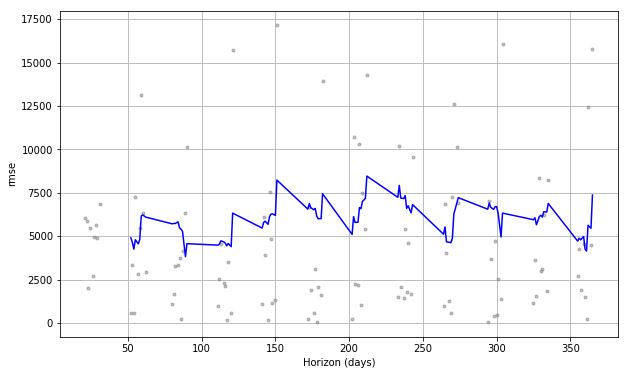

In [38]:
plot_cross_validation_metric(df_cv,metric='rmse');